# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [ ]:
import numpy as np

libri = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])
media = np.mean(libri)
print("Prezzo medio:", media)

più_cari = libri[libri > media]
print("Libri con prezzo maggiore della media:", più_cari)
sconto = più_cari * 10 / 100
libri[libri > media] = più_cari - sconto
print("Sconto 10% ai libri più costosi:", libri)

Prezzo medio: 18.983000000000004
Libri con prezzo maggiore della media: [22.5  31.2  24.9  19.99 27.3 ]
Sconto 10% ai libri più costosi: [14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

[np.float64(0.34), np.float64(0.35), np.float64(0.3333333333333333), np.float64(0.35), np.float64(0.352), np.float64(0.3466666666666667), np.float64(0.34285714285714286), np.float64(0.3675), np.float64(0.38222222222222224), np.float64(0.388), np.float64(0.38545454545454544), np.float64(0.37833333333333335), np.float64(0.36923076923076925), np.float64(0.36714285714285716), np.float64(0.376), np.float64(0.38125), np.float64(0.3764705882352941), np.float64(0.37222222222222223), np.float64(0.3705263157894737), np.float64(0.371)]


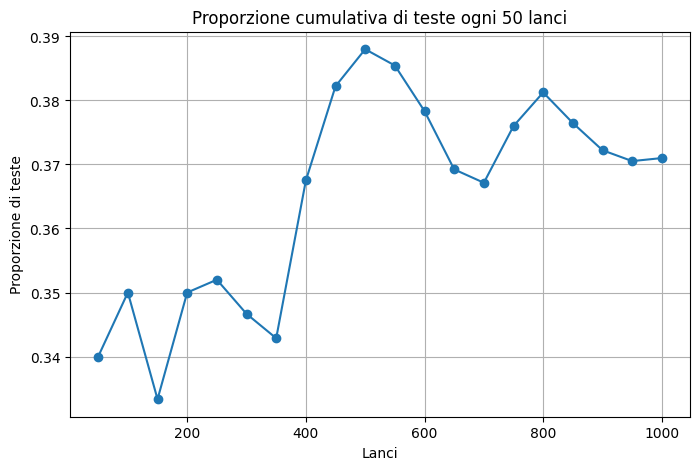

In [ ]:
import matplotlib.pyplot as plt

n_lanci = 1000
risultati = np.random.choice([0, 1], size=n_lanci, p=[2/3, 1/3])

# Proporzione cumulativa di teste ogni 50 lanci - modo 2:
steps = np.arange(50, 1001, 50)
propositions = [risultati[:i].mean() for i in steps]
print(propositions)

# Plot
plt.figure(figsize=(8,5))
plt.plot(steps, propositions, marker='o')
plt.title("Proporzione cumulativa di teste ogni 50 lanci")
plt.xlabel("Lanci")
plt.ylabel("Proporzione di teste")
plt.grid()
plt.show()

## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [58]:
def mat_normalizzata(matrice):
    """
    Normalizza una matrice:
      mat_norm = (mat - mean) / std
    Restituisce:
      mat_norm: matrice normalizzata
      mean: media originale
      std: deviazione standard originale
    """
    media = np.mean(matrice)
    std = np.std(matrice)
    normalizzata = (matrice - media) / std
    return normalizzata, media, std

# Test
test = np.random.normal(loc=5, scale=2, size=(6,10))
norm, orig_media, orig_std = mat_normalizzata(test)

# Verifica: media ~ 0, std ~ 1
print("Media matrice: ", orig_media)
print("Deviazione standard matrice: ", orig_std)
print("Media matrice normalizzata: ", np.mean(norm))
print("Deviazione standard matrice normalizzata: ", np.std(norm))


Media matrice:  4.8938487534623505
Deviazione standard matrice:  2.0174750281550073
Media matrice normalizzata:  8.326672684688674e-18
Deviazione standard matrice normalizzata:  0.9999999999999999


## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


In [62]:
import pandas as pd

df = pd.read_csv('books.csv')
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [68]:
# Nuova colonna
df['engagement_score'] = df['average_rating'] * np.log(1 + df['ratings_count'])

# Libro con massimo engagement_score
df.sort_values(by='engagement_score', ascending=False).head(1)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,engagement_score
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,68.11895


In [69]:
# libri con avarage_rating maggiore di 4.5
df[df['average_rating'] > 4.5].head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,engagement_score
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,65.328799
23,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...,65.127195
24,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,...,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...,66.260301
26,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,65.074563
134,135,62291,62291,1164465,175,055357342X,9.780554e+12,George R.R. Martin,2000.0,A Storm of Swords,...,527644,19497,1456,4820,36418,149268,335682,https://images.gr-assets.com/books/1497931121m...,https://images.gr-assets.com/books/1497931121s...,59.285168


1      Harry Potter and the Philosopher's Stone
0                              The Hunger Games
24         Harry Potter and the Deathly Hallows
17     Harry Potter and the Prisoner of Azkaban
23          Harry Potter and the Goblet of Fire
26       Harry Potter and the Half-Blood Prince
20    Harry Potter and the Order of the Phoenix
3                         To Kill a Mockingbird
30                                     The Help
22      Harry Potter and the Chamber of Secrets
Name: original_title, dtype: object


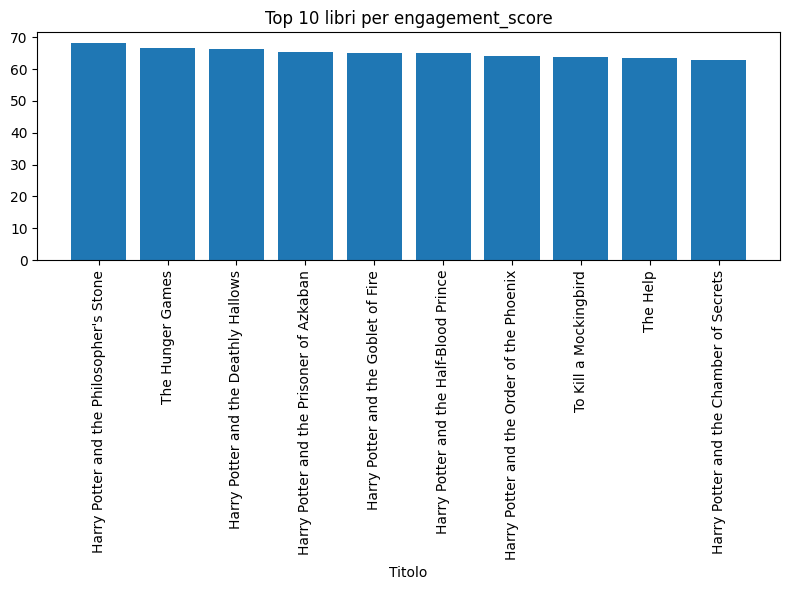

In [81]:
import matplotlib.pyplot as plt

# Grafico a barre con top 10 engagement_score
top10 = df.sort_values(by='engagement_score', ascending=False).head(10)
title = top10['original_title']
score = top10['engagement_score']
print(top10['original_title'])

plt.figure(figsize=(8,6))
plt.bar(title, score)
plt.xticks(rotation=90)
plt.title("Top 10 libri per engagement_score")
plt.xlabel("Titolo")
plt.tight_layout()
plt.show()

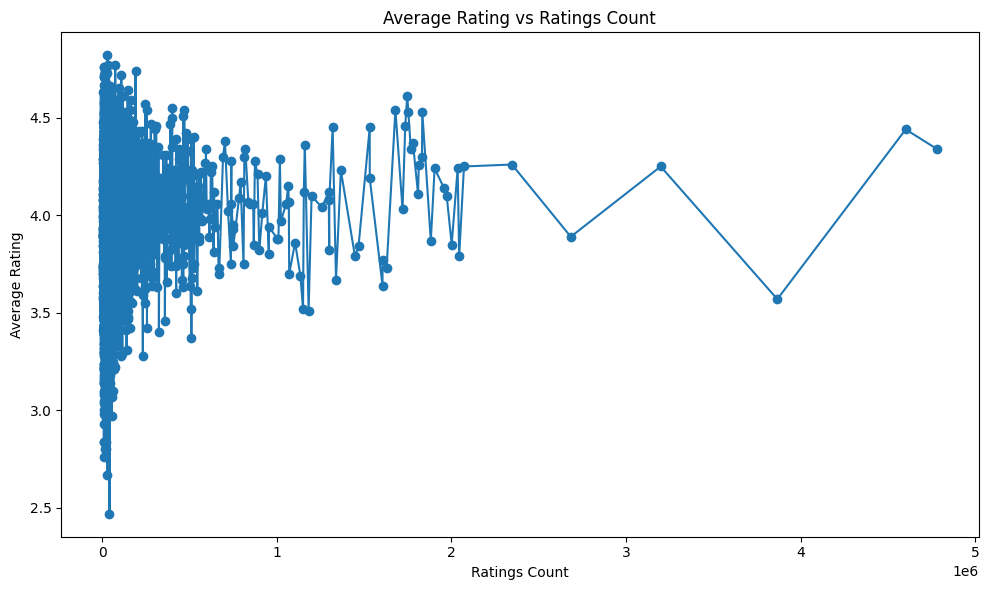

In [85]:
sorted_df = df.sort_values('ratings_count')
plt.figure(figsize=(10, 6))
plt.plot(sorted_df['ratings_count'], sorted_df['average_rating'], marker='o', linestyle='-')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.title('Average Rating vs Ratings Count')
plt.tight_layout()
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


Dimensioni: 32561 righe, 15 colonne
Valori mancanti:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
Età media per sesso:
sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64
Percentuale di Female con reddito > 50K: 3.62%
Percentuale di Male con reddito > 50K: 20.46%


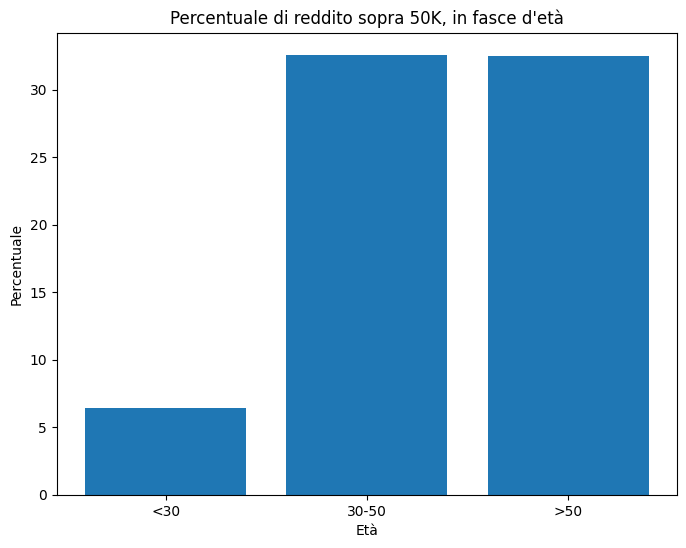

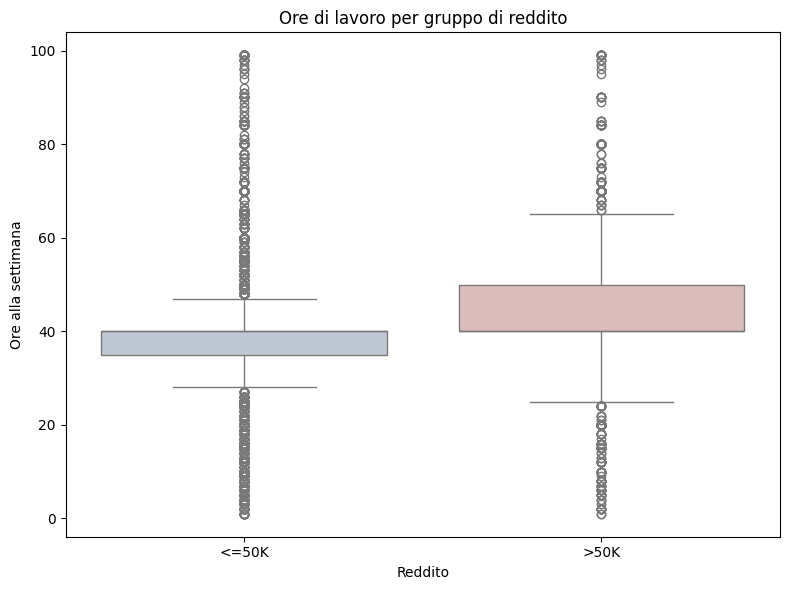

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,30-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,>50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<30


In [ ]:
import pandas as pd
import seaborn as sns

# considera '?' come NaN
df = pd.read_csv('adult_con_titoli.csv', na_values=['?'], skipinitialspace=True)  # rimuovo lo spazio dopo le virgole ' ?'
# rimpiazza '-' con '_'
df.columns = df.columns.str.replace('-', '_')

# 1. dimensioni
rows, cols = df.shape  # (righe, colonne)
print(f"Dimensioni: {rows} righe, {cols} colonne")

# 2. valori mancanti
print("Valori mancanti:")
print(df.isna().sum())

# 3. sostituzione NaN
moda_workclass = df['workclass'].mode().iloc[0]
moda_occupation = df['occupation'].mode().iloc[0]
moda_nativecountry = df['native_country'].mode().iloc[0]

df['workclass'] = df['workclass'].fillna(moda_workclass)
df['occupation'] = df['occupation'].fillna(moda_occupation)
df['native_country'] = df['native_country'].fillna(moda_nativecountry)

# 4. età media per sesso
print("Età media per sesso:")
print(df.groupby('sex')['age'].mean())

# 5. percentuale >50K per sesso
totale = len(df['income'])
magg50_f = len(df[(df['income'] == '>50K') & (df['sex'] == 'Female')])
magg50_m = len(df[(df['income'] == '>50K') & (df['sex'] == 'Male')])

percentuale_f = magg50_f / totale * 100
percentuale_m = magg50_m / totale * 100
print(f"Percentuale di Female con reddito > 50K: {percentuale_f:.2f}%")
print(f"Percentuale di Male con reddito > 50K: {percentuale_m:.2f}%")


# 6. nuova colonna age_group '<30', '30-50', '>50'
max_age = df['age'].max()
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, max_age], labels=['<30','30-50','>50'], include_lowest=True)

# 7. barplot
plt.figure(figsize=(8,6))

# creo una serie booleana e raggruppo i valori booleani (>50K) per fasce d'età
proporzione = (df['income'] == '>50K').groupby(df['age_group'], observed=True).mean()  # observed per eliminare il warning
x = proporzione.index
y = proporzione.values * 100

plt.bar(x,y)
plt.title("Percentuale di reddito sopra 50K, in fasce d'età")
plt.xlabel("Età")
plt.ylabel("Percentuale")
plt.show()

# boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='income', y='hours_per_week', hue='income', palette='vlag')
plt.title("Ore di lavoro per gruppo di reddito")
plt.xlabel("Reddito")
plt.ylabel("Ore alla settimana")
plt.tight_layout()
plt.show()

df.head()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

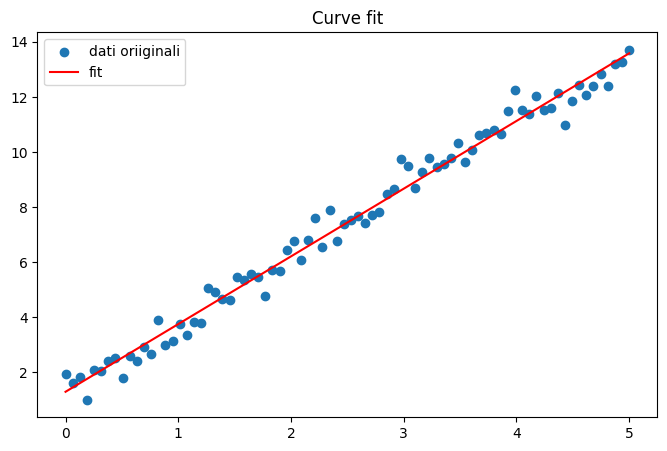

MAE:  0.34331512805075093
RMSE:  0.44188533857443507


In [184]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

## Modello lineare
def linear_model(x, a, b):
    return a * x + b

# dati
x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

# stima dei parametri (a,b) con curve_fit
popt, _ = curve_fit(linear_model, x, y)
a, b = popt
# calcola i valori stimati dalla retta
y_pred = linear_model(x, a, b)

# plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, label='dati oriiginali')
plt.plot(x, y_pred, label='fit', color='r')
plt.title("Curve fit")
plt.legend()
plt.show()

# MAE e RSME
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
print("MAE: ", mae)
print("RMSE: ", rmse)

